In [1]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

### Feature Engineering -> Train Data

In [3]:
# filling Nan value of Age
train.Age = train.Age.fillna(train.Age.median())

# filling Nan value of Emabarked
train.Embarked = train.Embarked.fillna(train.Embarked.mode()[0])

# getting Dummie variables for Sex feature
gender_dummies = pd.get_dummies(train.Sex,drop_first=True)

# getting Dummie variables for Embarked feature
Embarked_dummies = pd.get_dummies(train.Embarked,drop_first=True)

# converting the Name feature to Rare,Miss,Mrs
train['title'] = train.Name.str.extract(' ([A-Za-z]+)\.',expand=False)
train['title'] = train['title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
train['title'] = train['title'].replace('Mlle', 'Miss')
train['title'] = train['title'].replace('Ms', 'Miss')
train['title'] = train['title'].replace('Mme', 'Mrs')

# getting Dummie variables for title feature
title_dummies = pd.get_dummies(train.title,drop_first=True)

# concating all dummies with train dataframe
train = pd.concat([train,gender_dummies,Embarked_dummies,title_dummies],axis=1)

# droping the main features after geting dummies
train = train.drop(["PassengerId","Cabin","Sex","Ticket","Embarked","Name","title"],axis=1)

### Feature Engineering -> Test Data

In [4]:
# filling Nan value of Age
test.Age = test.Age.fillna(test.Age.median())

# filling Nan value of Fare
test.Fare = test.Fare.fillna(test.Fare.mode()[0])

# getting Dummie variables for Sex feature
gender_dummies = pd.get_dummies(test.Sex,drop_first=True)

# getting Dummie variables for Embarked feature
Embarked_dummies = pd.get_dummies(test.Embarked,drop_first=True)

# converting the Name feature to Rare,Miss,Mrs
test['title'] = test.Name.str.extract(' ([A-Za-z]+)\.',expand=False)
test['title'] = test['title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
test['title'] = test['title'].replace('Mlle', 'Miss')
test['title'] = test['title'].replace('Ms', 'Miss')
test['title'] = test['title'].replace('Mme', 'Mrs')

# getting Dummie variables for title feature
title_dummies = pd.get_dummies(test.title,drop_first=True)

# concating all dummies with train dataframe
test = pd.concat([test,gender_dummies,Embarked_dummies,title_dummies],axis=1)

# droping the main features after geting dummies
test = test.drop(["PassengerId","Cabin","Sex","Ticket","Embarked","Name","title"],axis=1)

In [5]:
train['Total_Family_member'] = (train.SibSp + train.Parch)+1

In [6]:
train.Total_Family_member.value_counts()

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: Total_Family_member, dtype: int64

<AxesSubplot:xlabel='Age'>

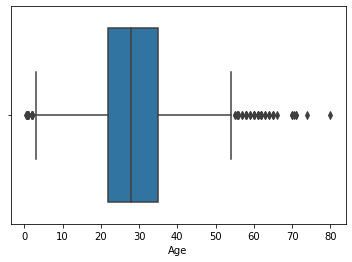

In [7]:
sns.boxplot(train.Age)

<AxesSubplot:xlabel='Age', ylabel='Density'>

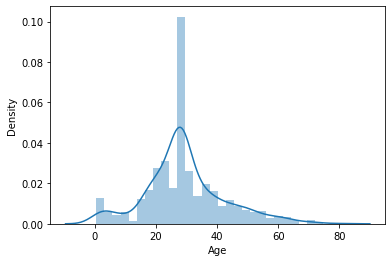

In [8]:
sns.distplot(train.Age)

In [9]:
age_mean = train.Age.mean()
age_std = train.Age.std()
lower = age_mean - 3*age_std
upper = age_mean + 3*age_std

# identify outliers
outliers = [x for x in train.Age if x < lower or x > upper]

# remove outliers
outliers_removed = [x for x in train.Age if x >= lower and x <= upper]

for i in range(len(outliers)):
    outliers_removed.append(np.median(outliers_removed))

train['Age_outlier_removed'] = outliers_removed

<AxesSubplot:xlabel='Fare'>

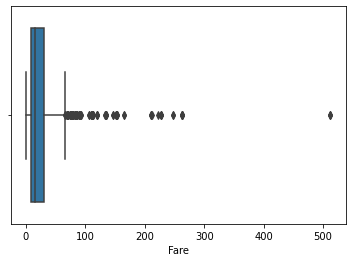

In [10]:
sns.boxplot(train.Fare)

<AxesSubplot:xlabel='Fare', ylabel='Density'>

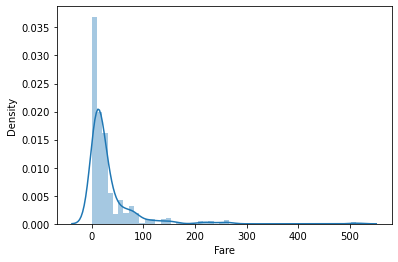

In [11]:
sns.distplot(train.Fare)

In [12]:
## for non-GD data

In [13]:
# calculate interquartile range
q25 = np.percentile(train.Fare , 25)
q90 = np.percentile(train.Fare,90)

iqr = q90 - q25
cut_off = iqr * 1.5

lower = q25 - cut_off
upper = q90 + cut_off

# identify outliers
outliers_fare = [x for x in train.Fare if x < lower or x > upper]

# remove outliers
outliers_removed_fare = [x for x in train.Fare if x >= lower and x <= upper]

for i in range(len(outliers_fare)):
    outliers_removed_fare.append(np.mean(outliers_removed_fare))

train['outliers_removed_fare'] = outliers_removed_fare

In [14]:
train = train.drop(['Age','Fare',"SibSp",'Parch'],axis=1)

In [15]:
train.Total_Family_member.value_counts()

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: Total_Family_member, dtype: int64

In [16]:
train.head()

,Survived,Pclass,male,Q,S,Miss,Mr,Mrs,Rare,Total_Family_member,Age_outlier_removed,outliers_removed_fare
0,0,3,1,0,1,0,1,0,0,2,22.0,7.2500
1,1,1,0,0,0,0,0,1,0,2,38.0,71.2833
2,1,3,0,0,1,1,0,0,0,1,26.0,7.9250
3,1,1,0,0,1,0,0,1,0,2,35.0,53.1000
4,0,3,1,0,1,0,1,0,0,1,35.0,8.0500


In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Survived               891 non-null    int64  
 1   Pclass                 891 non-null    int64  
 2   male                   891 non-null    uint8  
 3   Q                      891 non-null    uint8  
 4   S                      891 non-null    uint8  
 5   Miss                   891 non-null    uint8  
 6   Mr                     891 non-null    uint8  
 7   Mrs                    891 non-null    uint8  
 8   Rare                   891 non-null    uint8  
 9   Total_Family_member    891 non-null    int64  
 10  Age_outlier_removed    891 non-null    float64
 11  outliers_removed_fare  891 non-null    float64
dtypes: float64(2), int64(3), uint8(7)
memory usage: 41.0 KB


In [18]:
## fOR test

In [19]:
test['Total_Family_member'] = (test.SibSp + test.Parch)+1

In [20]:
age_mean = test.Age.mean()
age_std = test.Age.std()
lower = age_mean - 3*age_std
upper = age_mean + 3*age_std

# identify outliers
outliers = [x for x in test.Age if x < lower or x > upper]

# remove outliers
outliers_removed = [x for x in test.Age if x >= lower and x <= upper]

for i in range(len(outliers)):
    outliers_removed.append(np.median(outliers_removed))

test['Age_outlier_removed'] = outliers_removed

In [21]:
# calculate interquartile range
q25 = np.percentile(test.Fare , 25)
q90 = np.percentile(test.Fare,90)

iqr = q90 - q25
cut_off = iqr * 1.5

lower = q25 - cut_off
upper = q90 + cut_off

# identify outliers
outliers_fare = [x for x in test.Fare if x < lower or x > upper]

# remove outliers
outliers_removed_fare = [x for x in test.Fare if x >= lower and x <= upper]

for i in range(len(outliers_fare)):
    outliers_removed_fare.append(np.mean(outliers_removed_fare))

test['outliers_removed_fare'] = outliers_removed_fare

In [22]:
test = test.drop(['Age','Fare',"SibSp",'Parch'],axis=1)

In [23]:
test.head()

,Pclass,male,Q,S,Miss,Mr,Mrs,Rare,Total_Family_member,Age_outlier_removed,outliers_removed_fare
0,3,1,1,0,0,1,0,0,1,34.5,7.8292
1,3,0,0,1,0,0,1,0,2,47.0,7.0000
2,2,1,1,0,0,1,0,0,1,62.0,9.6875
3,3,1,0,1,0,1,0,0,1,27.0,8.6625
4,3,0,0,1,0,0,1,0,3,22.0,12.2875


In [24]:
train.head()

,Survived,Pclass,male,Q,S,Miss,Mr,Mrs,Rare,Total_Family_member,Age_outlier_removed,outliers_removed_fare
0,0,3,1,0,1,0,1,0,0,2,22.0,7.2500
1,1,1,0,0,0,0,0,1,0,2,38.0,71.2833
2,1,3,0,0,1,1,0,0,0,1,26.0,7.9250
3,1,1,0,0,1,0,0,1,0,2,35.0,53.1000
4,0,3,1,0,1,0,1,0,0,1,35.0,8.0500


In [25]:
### dividing into independent and dependent features only by test data

In [26]:
#X_train = train.iloc[:,1:]
#y_train = train['Survived']
#X_test = test
X = train.iloc[:,1:]
y = train['Survived']
X_TEST = test
from sklearn.model_selection import train_test_split
X_train ,X_test ,y_train ,y_test = train_test_split(X,y,test_size=0.2,random_state=0)


## K-Fold Cross Validation

In [27]:
from sklearn.metrics import accuracy_score,classification_report
def training_model(estimater ,X_train,y_train,X_test,y_test):
    model = estimater
    model.fit(X_train,y_train)
    score = model.score(X_train,y_train)
    print(f"\nTrain Accurcy: {score}")
    y_pred = model.predict(X_test)
    print(f"\nTest Accurcy: {accuracy_score(y_test,y_pred)}")
    print(f"\nClassification Report:\n {classification_report(y_test,y_pred)}")

In [28]:
from sklearn.linear_model import LogisticRegression
training_model(LogisticRegression(),X_train,y_train,X_test,y_test)




Train Accurcy: 0.824438202247191

Test Accurcy: 0.7932960893854749

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.82      0.83       110
           1       0.72      0.75      0.74        69

    accuracy                           0.79       179
   macro avg       0.78      0.79      0.78       179
weighted avg       0.80      0.79      0.79       179




Train Accurcy: 1.0

Test Accurcy: 0.8044692737430168

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.85      0.84       110
           1       0.75      0.74      0.74        69

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



In [30]:
from sklearn.tree import DecisionTreeClassifier
training_model(DecisionTreeClassifier(),X_train,y_train,X_test,y_test)


Train Accurcy: 1.0

Test Accurcy: 0.7318435754189944

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.82      0.79       110
           1       0.67      0.59      0.63        69

    accuracy                           0.73       179
   macro avg       0.72      0.71      0.71       179
weighted avg       0.73      0.73      0.73       179



In [31]:
from sklearn.neighbors import KNeighborsClassifier
training_model(KNeighborsClassifier(),X_train,y_train,X_test,y_test)


Train Accurcy: 0.7654494382022472

Test Accurcy: 0.7094972067039106

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.83      0.78       110
           1       0.65      0.52      0.58        69

    accuracy                           0.71       179
   macro avg       0.69      0.67      0.68       179
weighted avg       0.70      0.71      0.70       179



In [32]:
from sklearn.svm import SVC
training_model(SVC(C=100, gamma=0.01),X_train,y_train,X_test,y_test)


Train Accurcy: 0.9199438202247191

Test Accurcy: 0.7486033519553073

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.75      0.79       110
           1       0.65      0.74      0.69        69

    accuracy                           0.75       179
   macro avg       0.74      0.75      0.74       179
weighted avg       0.76      0.75      0.75       179



In [33]:
from xgboost import XGBClassifier
training_model(XGBClassifier(),X_train,y_train,X_test,y_test)

[08:54:41] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

Train Accurcy: 0.9873595505617978

Test Accurcy: 0.7932960893854749

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.81      0.83       110
           1       0.72      0.77      0.74        69

    accuracy                           0.79       179
   macro avg       0.78      0.79      0.78       179
weighted avg       0.80      0.79      0.79       179



In [36]:
xgb_clf = XGBClassifier()
xgb_clf.fit(X,y)
y_predicted = xgb_clf.predict(test)

[08:55:07] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [40]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X,y)
y_predicted = rf_clf.predict(test)

In [37]:
## i select the RandomForest

In [41]:
pred = pd.DataFrame(y_predicted)
sub_df = pd.read_csv('gender_submission.csv')
datasets = pd.concat([sub_df['PassengerId'],pred],axis=1)
datasets.columns=['PassengerId','Survived']
datasets.to_csv('modified_Titanc5_GS_RAndom.csv',index=False)